In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-cheese-dataset/cheese_details.csv
/kaggle/input/global-cheese-dataset/cheeses.csv


In [2]:
df=pd.read_csv('/kaggle/input/global-cheese-dataset/cheese_details.csv')
df

,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
0,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi
1,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN
2,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN
3,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN
4,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,https://www.cheese.com/sveciaost/,cow,Sweden,Low-laying regions,NaN,"semi-hard, brined",45%,NaN,"creamy, supple",rindless,pale yellow,acidic,NaN,False,False,NaN,NaN,NaN
1183,https://www.cheese.com/swag/,goat,Australia,South Australia,NaN,"fresh firm, artisan",NaN,NaN,"creamy, crumbly",ash coated,white,"acidic, creamy",fresh,True,False,NaN,NaN,Woodside Cheese Wrights
1184,https://www.cheese.com/swaledale/,sheep,England,"Swaledale, North Yorkshire",NaN,hard,NaN,NaN,semi firm,NaN,yellow,"smooth, sweet",floral,True,False,Swaledale Sheep Cheese,NaN,NaN
1185,https://www.cheese.com/sweet-style-swiss/,NaN,Switzerland,NaN,NaN,"semi-hard, artisan",NaN,NaN,"firm, supple",waxed,NaN,nutty,"nutty, sweet",False,False,NaN,NaN,NaN


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

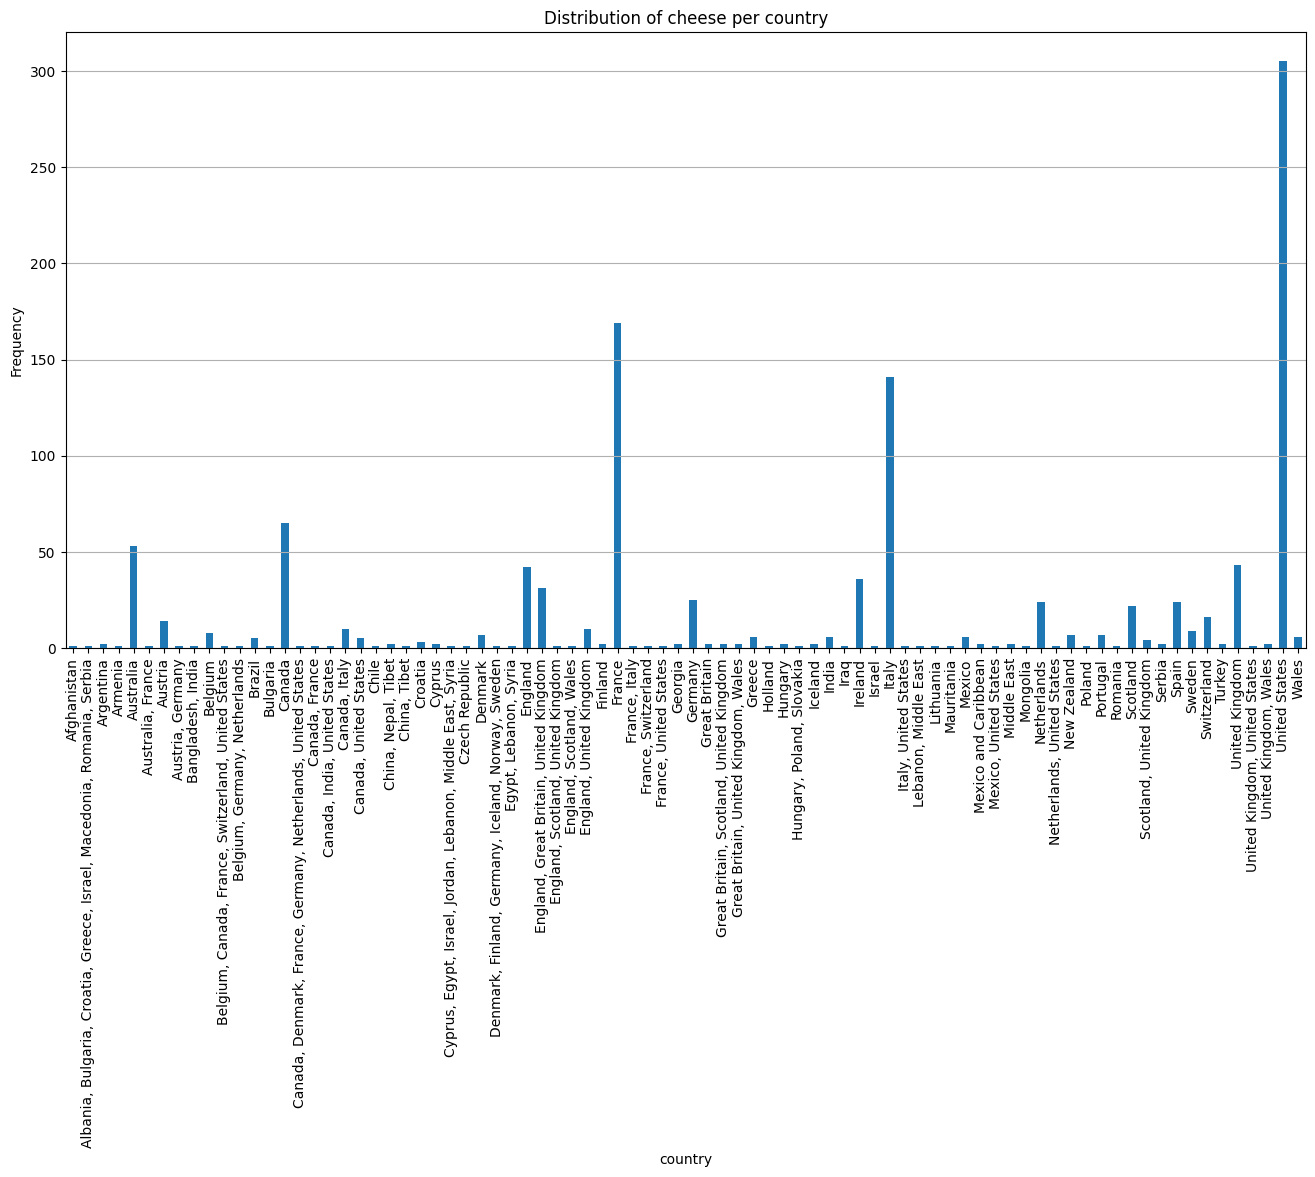

In [4]:
# Distribution of cheese per country

Freq = df["country"].value_counts().sort_index() \
          .plot(kind = "bar", title = "Distribution of cheese per country", figsize = (16, 8))
 
Freq.set_xlabel("country")
Freq.set_ylabel("Frequency")
plt.grid(True, axis='y')
plt.show()

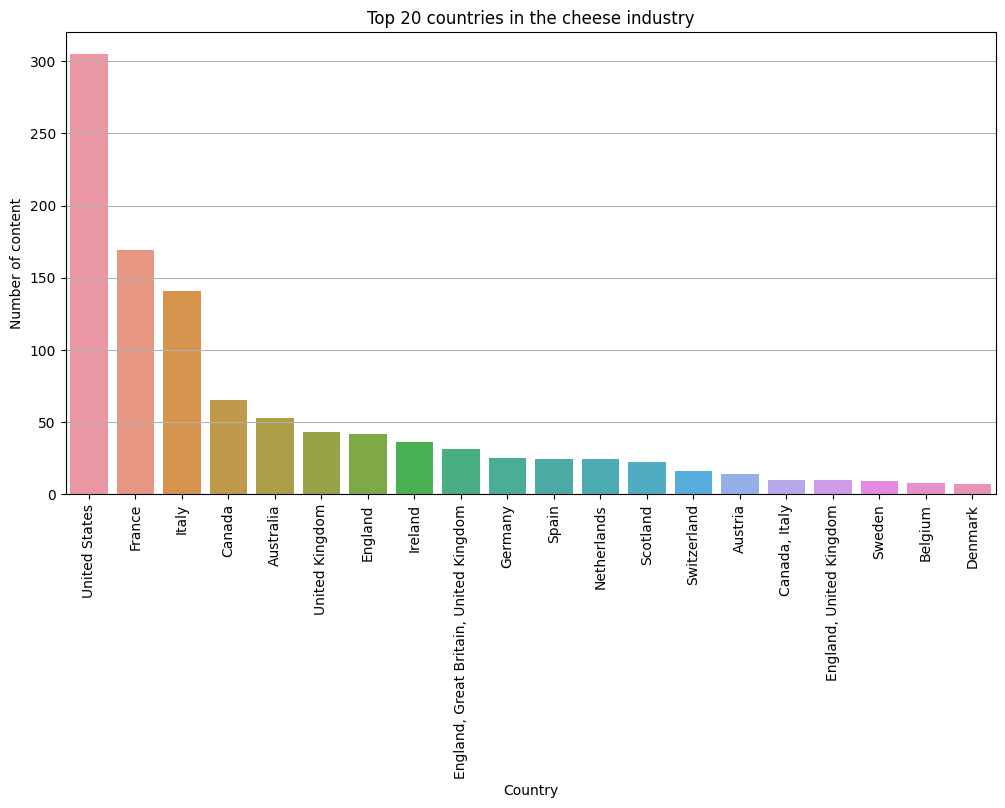

country
United States                             305
France                                    169
Italy                                     141
Canada                                     65
Australia                                  53
United Kingdom                             43
England                                    42
Ireland                                    36
England, Great Britain, United Kingdom     31
Germany                                    25
Spain                                      24
Netherlands                                24
Scotland                                   22
Switzerland                                16
Austria                                    14
Canada, Italy                              10
England, United Kingdom                    10
Sweden                                      9
Belgium                                     8
Denmark                                     7
Name: count, dtype: int64

In [5]:
top_countries = df['country'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 20 countries in the cheese industry')
plt.xlabel('Country')
plt.ylabel('Number of content')
plt.grid(True, axis='y')
plt.xticks(rotation=90)
plt.show()

top_countries

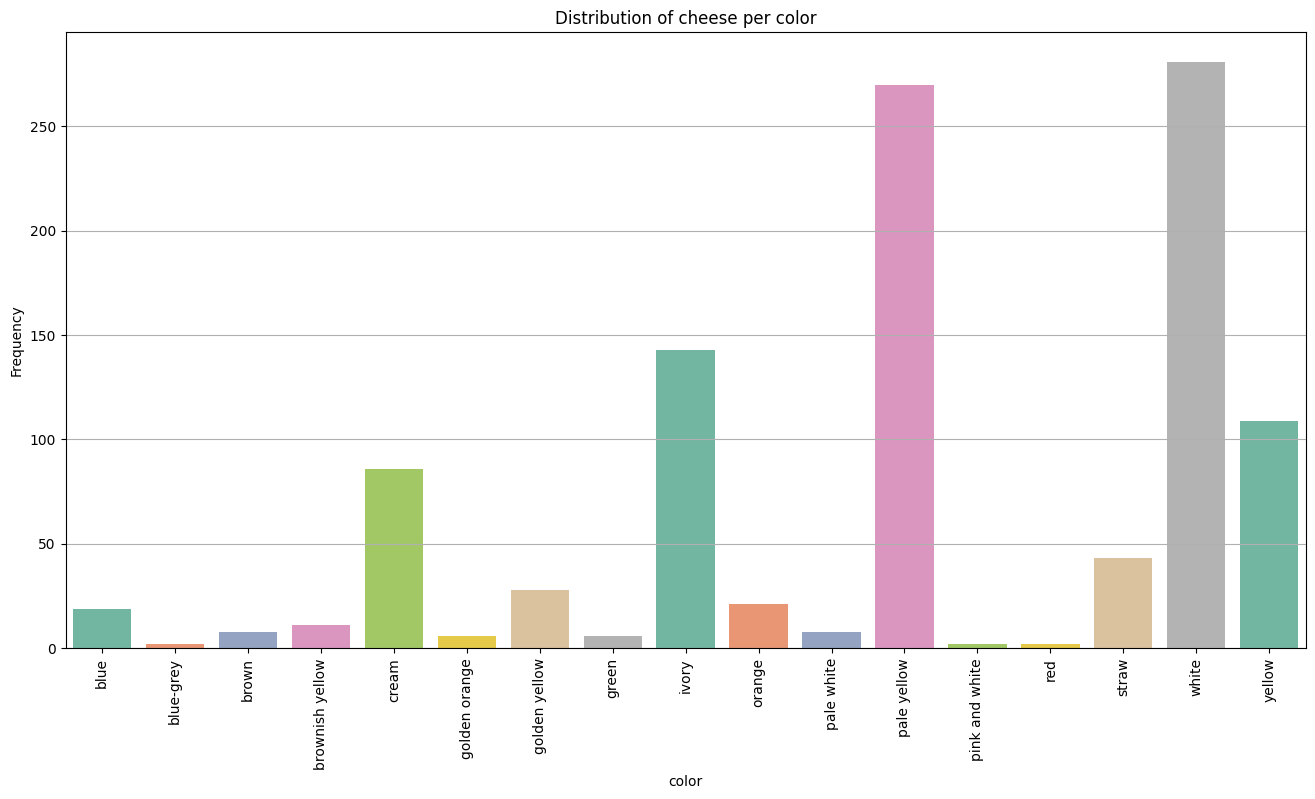

In [6]:
Distribution_milk = df['color'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_milk.index, y=Distribution_milk.values, palette='Set2')
plt.title("Distribution of cheese per color")
plt.xlabel('color')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

In [7]:
import plotly.express as px
content_type = df.groupby(['family']).size().reset_index(name='counts')
content_type
fig = px.pie(content_type, names = 'family',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of cheese family',height =  700 , width = 900)
fig.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'England'),
  Text(7, 0, 'Ireland'),
  Text(8, 0, 'England, Great Britain, United Kingdom'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'Scotland'),
  Text(13, 0, 'Switzerland'),
  Text(14, 0, 'Austria'),
  Text(15, 0, 'Canada, Italy'),
  Text(16, 0, 'England, United Kingdom'),
  Text(17, 0, 'Sweden'),
  Text(18, 0, 'Belgium'),
  Text(19, 0, 'Denmark')])

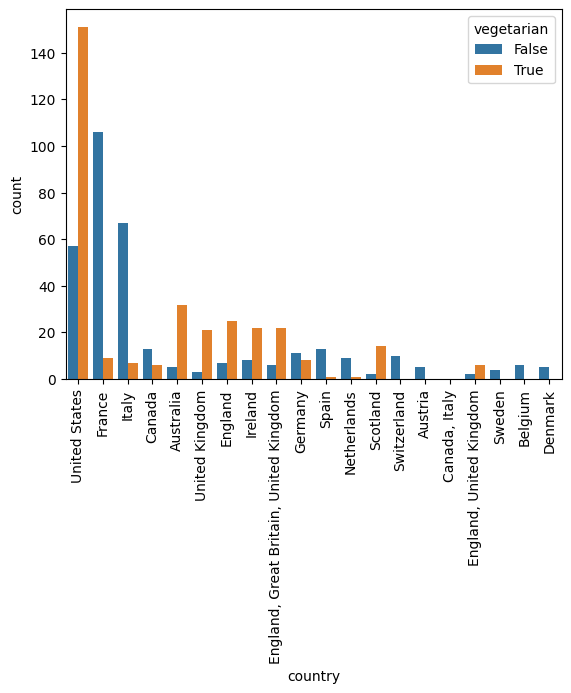

In [8]:
sns.countplot(x = df['country'], order = top_countries.index, hue = df['vegetarian'])
plt.xticks(rotation=90)

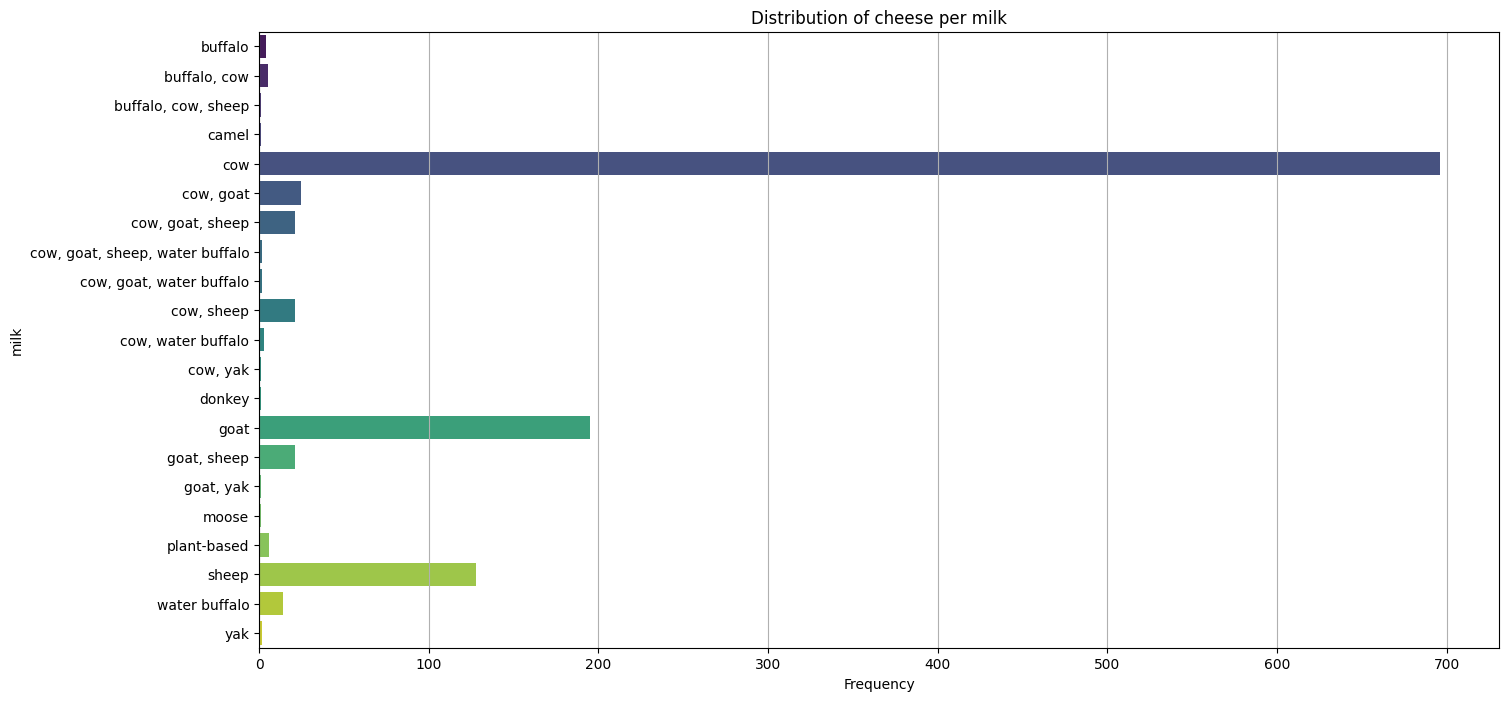

In [9]:
Distribution_milk = df['milk'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(y=Distribution_milk.index, x=Distribution_milk.values, palette='viridis')
plt.title("Distribution of cheese per milk")
plt.ylabel('milk')
plt.xlabel('Frequency')
plt.grid(True, axis='x')
plt.show()

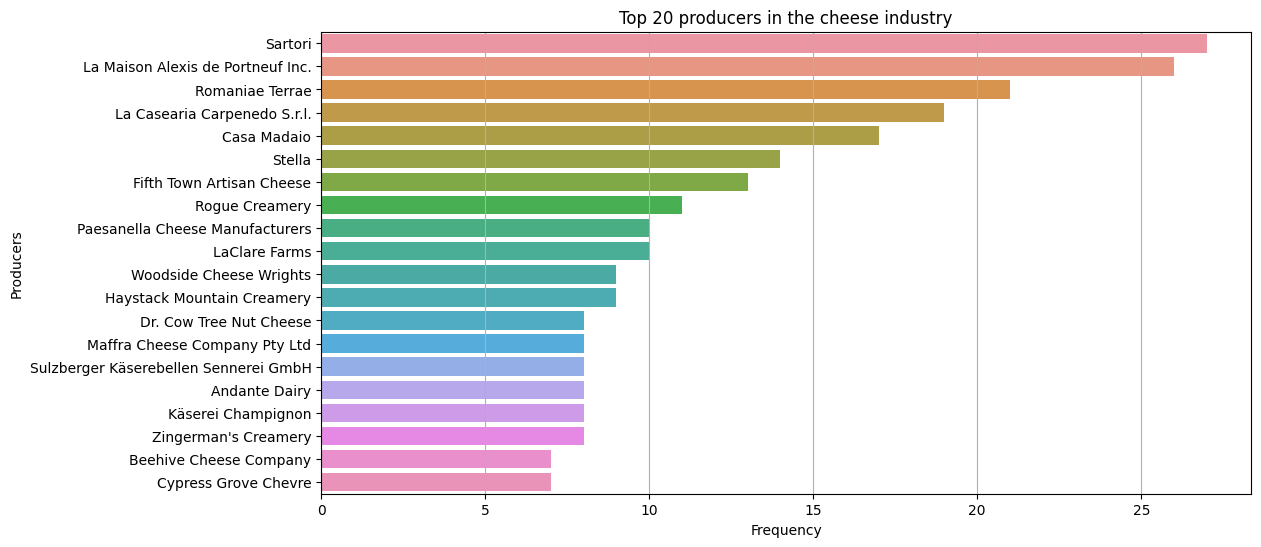

country
United States                             305
France                                    169
Italy                                     141
Canada                                     65
Australia                                  53
United Kingdom                             43
England                                    42
Ireland                                    36
England, Great Britain, United Kingdom     31
Germany                                    25
Spain                                      24
Netherlands                                24
Scotland                                   22
Switzerland                                16
Austria                                    14
Canada, Italy                              10
England, United Kingdom                    10
Sweden                                      9
Belgium                                     8
Denmark                                     7
Name: count, dtype: int64

In [10]:
top_producers = df['producers'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_producers.index, x=top_producers.values)
plt.title('Top 20 producers in the cheese industry')
plt.xlabel('Frequency')
plt.ylabel('Producers')
plt.grid(True, axis='x')
plt.show()

top_countries

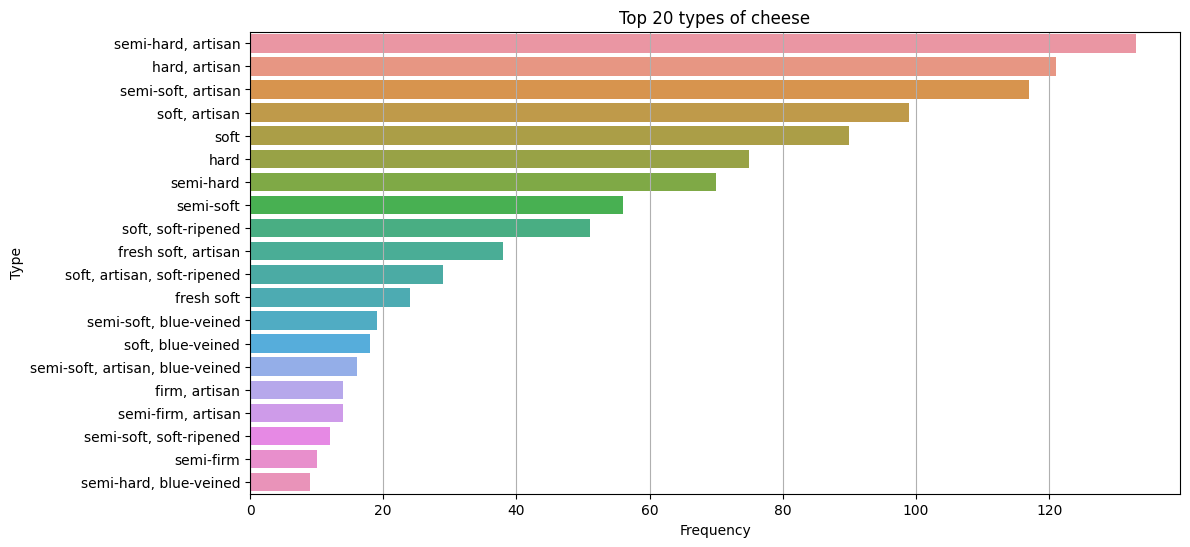

country
United States                             305
France                                    169
Italy                                     141
Canada                                     65
Australia                                  53
United Kingdom                             43
England                                    42
Ireland                                    36
England, Great Britain, United Kingdom     31
Germany                                    25
Spain                                      24
Netherlands                                24
Scotland                                   22
Switzerland                                16
Austria                                    14
Canada, Italy                              10
England, United Kingdom                    10
Sweden                                      9
Belgium                                     8
Denmark                                     7
Name: count, dtype: int64

In [11]:
top_producers = df['type'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_producers.index, x=top_producers.values)
plt.title('Top 20 types of cheese')
plt.xlabel('Frequency')
plt.ylabel('Type')
plt.grid(True, axis='x')
plt.show()

top_countries